In [1]:
import pandas as pd

# buat dataframe read data
df = pd.read_csv('..//data/socr.csv', sep=',')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
# Menghitung statistik deskriptif pada kolom numeric dengan describe.
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [3]:
# Konversi data menjadi satuan Cm dan Kg
df1 = (
     df[["Height(Inches)", "Weight(Pounds)"]]
     .rename(columns={"Height(Inches)": "tinggi_cm",
                      "Weight(Pounds)": "berat_kg"})
     .assign(tinggi_cm=lambda x: x.tinggi_cm * 2.54,
             berat_kg=lambda x: x.berat_kg * 0.453592
    )
.round({"tinggi_cm": 2, "berat_kg": 2})
).copy()
df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [5]:
# Membagi dataset untuk training dan testing
from sklearn.model_selection import train_test_split

# variabel independen/bebas
x = df1[["tinggi_cm"]]

# variabel dependen/terikat
y = df1["berat_kg"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=7
)

x_train.head()


,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


In [6]:
#  Pemodelan data : dengan data training
from sklearn.linear_model import LinearRegression

# uat object model instan dari class LinearRegression
model = LinearRegression()

# Lakukan proses training
model.fit(x_train, y_train) 


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print("Koefiesien (kg per cm):     ", model.coef_[0])
print("Intercept (kg):             ", model.intercept_)
print("R^2:                        ", r2)
print("MAE:                        ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:                        ", rmse)


Koefiesien (kg per cm):      0.5518217971118455
Intercept (kg):              -37.65688232508077
R^2:                         0.24989238901493693
MAE:                         3.6704108331736665
RMSE:                         4.60900592355825


In [8]:
# Persamaan Regresi 
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.657


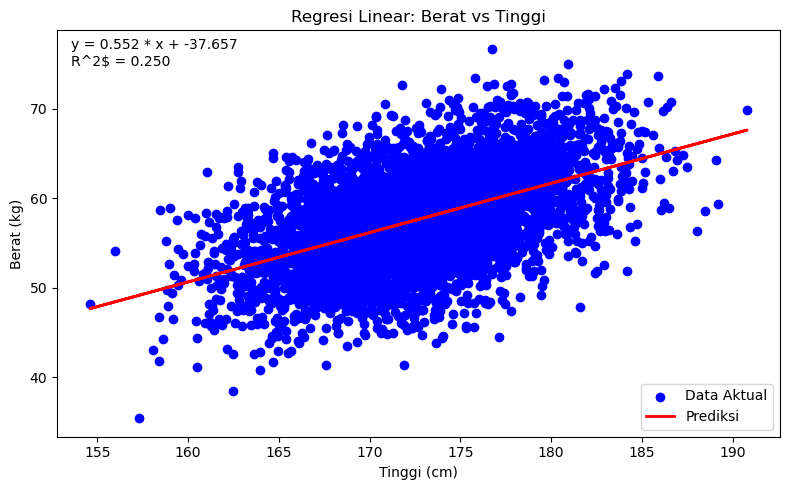

In [11]:
import matplotlib.pyplot as plt

# Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color="blue", label="Data Aktual")
# Garis regresi
plt.plot(x_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\nR^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
data = pd.read_csv('..//data/test.csv')
y_pred = model.predict(data[['tinggi_cm']])
data['predicted_berat_kg'] = y_pred
data["selisih_berat_kg"] = data["actual_berat"] - data["predicted_berat_kg"]

denom = data["actual_berat"].replace(0, np.nan)  # Ganti 0 dengan NaN untuk menghindari
data["Akurasi %"] = (1 - abs(data["selisih_berat_kg"] / denom)).clip(lower=0, upper=1) * 100

data

,No,nama,tinggi_cm,actual_berat,predicted_berat_kg,selisih_berat_kg,Akurasi %
0,1,Rafa,168,58.5,55.049180,3.450820,94.101162
1,2,Tiara,162,78.2,51.738249,26.461751,66.161443
2,3,Tia,155,52.7,47.875496,4.824504,90.845344
3,4,Kayla,160,70.3,50.634605,19.665395,72.026465
4,5,Bani,183,65.8,63.326507,2.473493,96.240891
